In [1]:
import pylab             as     pl
import numpy             as     np
import matplotlib.pyplot as     plt

from   astropy.cosmology import Planck15

# OII and <u>more<u> galaxies

Whether by looking further, or by collecting those that we've missed previously, our science always gets better with more galaxies!  Problem is, we've looked at all the easy, bright galaxies already and things get harder as we are forced to observe the faintest galaxies we know of.  We have to be smart about how we do this and sometimes a surprising opportunity presents itself ...

_Warning:  this notebook takes a step up in difficulty to let us design more fun experiments based on what you'll learn here.  If you're having any problems, please [ask](https://github.com/michaelJwilson/DESI-HighSchool/issues/new/choose).  Stick with it!_

Tired of listening to your parents?  Atoms feel the same way.  Their life if a series of rules, rules, rules.  Do this, don't do that;  the [list](https://en.wikipedia.org/wiki/Selection_rule) is long.  But just sometimes, they get sick of it and rebel,

![title](images/Climate.png)

Turns out that a rebellion, once in a while, can be a good thing.  For instance, (doubly) ionised oxygen or [OII], (incredibly rarely) emits a unique doublet that it wouldn't [otherwise](https://en.wikipedia.org/wiki/Forbidden_mechanism).  Let's see what happens.

In [2]:
# Wavelengths of OII doublet.
lambdaa = 3727.092 # Angstroms
lambdab = 3729.875 # Angstorms

# Energy weighted mean.
OII     = 3728.483

# Width of each line due to thermal broadening.
def width(center, dv):    
    # velocity difference [speed of light]
    return  center * dv

Text(0, 0.5, 'Normalised flux')

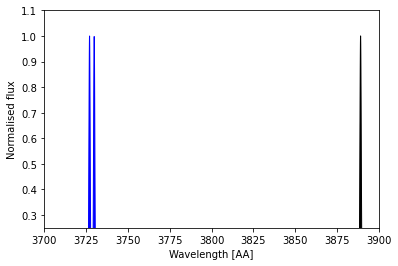

In [3]:
wave     = np.arange(1000, 1.e4, 0.05)

dlambdaa = width(lambdaa, 1.e-4)
dlambdab = width(lambdab, 1.e-4) 

def gaussian(wave, center, width):
    #  https://en.wikipedia.org/wiki/Gaussian_function 
    norm = np.sqrt(2. * np.pi / width)
    
    return  np.exp(-0.5 * (wave - center)**2. / width**2.)

ax       = pl.gca()

ax.fill_between(wave, 0., gaussian(wave, lambdaa, dlambdaa), color='b', alpha=1.0)
ax.fill_between(wave, 0., gaussian(wave, lambdab, dlambdab), color='b', alpha=1.0)

ax.fill_between(wave, 0., gaussian(wave, 3889.0, width(3889.0, 1.e-4)), color='k', alpha=1.)

pl.xlim(3700., 3900.)
pl.ylim(0.25, 1.1)

pl.xlabel('Wavelength [AA]')
pl.ylabel('Normalised flux')

First, the _forbidden_ [OII] transitions (blue) represent a doublet of two closely spaced lines.  These have finite width as the emitting stars are moving (at 0.01% in this example) leading to the usual Doppler broadening.  Contrast this with the black He I line, which is a single line or "singlet".  Trouble is, a single line emitted by a galaxy at one redshift can look like a different line at another redshift.

Your turn, if there was a Lyman-$\alpha$ emitter at $z=4.0$, would I be able to tell the difference from a H-$\alpha$ emitter (6564.61 Angstroms) at a different redshift?  What redshift would this second galaxy have?  Remember, the observed wavelength is $(1 + z) \ \times$ the rest-frame wavelength and Lyman-$\alpha$ is the 2-1 transition of Hydrogen we saw in the Intro.

So [OII] is unique in that, as a doublet, we're more likely to be able to tell it apart from singlets at different redshifts.  The second great thing is that it's the second strongest line emitted by young stars (the first being H-$\alpha$), as in the Orion nebulae - an iconic picture of star formation:

<img src="images/orion.jpg" alt="Drawing" style="width: 800px;"/>

Galaxies at high redshift are younger and more actively forming stars hence they emit lots of [OII].  So, as we look further out, we're more likely to see OII emitters.  As these galaxies are so far away, it'd be very difficult to detect something as faint if it weren't for this OII emission:

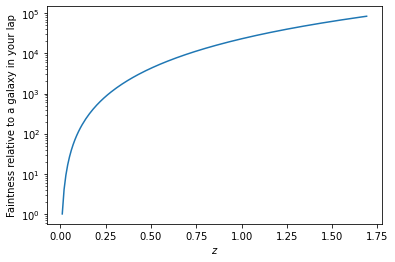

In [4]:
zs       = np.arange(0.01, 1.7, 0.01)
lumdists = Planck15.luminosity_distance(zs)

faints   = (lumdists / lumdists[0])**2.

pl.xlabel(r'$z$')
pl.ylabel('Faintness relative to a galaxy in your lap')

pl.semilogy(zs, faints)

By $z=0.25$, a galaxy is 1000x fainter than it would be in your lap.  By $z=1.75$, the furthest ELG detected by DESI, its 10,000 times fainter (how much fainter depends on whether there's Dark Energy in the Universe - here we've assumed the ~70% we learnt of in the Intro).  [Astropy](https://docs.astropy.org/en/stable/index.html) makes this really easy to figure out, but it'd be much better to understand how to get there.  To get some idea, try [here](https://in-the-sky.org/article.php?term=cosmological_distance).

So, we want emission-line galaxies (ELG) with an OII doublet.  We had better be sure that our telescope, and instrument for dispersing light, is capable of detecting and "resolving" this faint signal.  Crucially, our instrument must be designed to ensure that the doublet is not blurerd, as this would turn the doublet into a singlet and lead to the same confusion we would like to avoid.  Question is, how should we do this?  Would a simple lab. [prism](https://en.wikipedia.org/wiki/Prism_spectrometer) suffice?

The answer is no, the prism would have to be much too big and lose too much light to achieve the dispersion - separatation between colors - required.  We need something more advanced, a grating, which can disperses light due to diffraction (or reflection) and interference caused by a series of slits etched into metal (with diamond).  See [here](https://en.wikipedia.org/wiki/Diffraction_grating) for the details.

In fact, DESI uses a special grating that changes the [refractive index](https://en.wikipedia.org/wiki/Refractive_index) of glass, thousands of times every millimeter, to achieve the same [effect](https://arxiv.org/pdf/1611.00037.pdf):

<img src="images/vpg.jpg" alt="Drawing" style="width: 700px;"/>

Etching these lines is expensive, so we need to be minimise how many we need.  You wouldn't waste your pocket money, right?  So what resolution do we _need_ for this (OII) emission-line galaxy science? And what does that mean for the instrument we need to build?  

The resolution $R$ is defined to be $(\Delta \lambda /\lambda)$, where $\Delta \lambda$ is the effective width of a (Gaussian) line.  So as the instrumental resolution gets lower, our observed lines get broader:

In [5]:
def dlamba_inst(R, z, center):
    # eqn. (2) of https://arxiv.org/pdf/1310.0615.pdf
    return  (1. + z) * center / R # [Angstroms]

(3710.0, 3750.0)

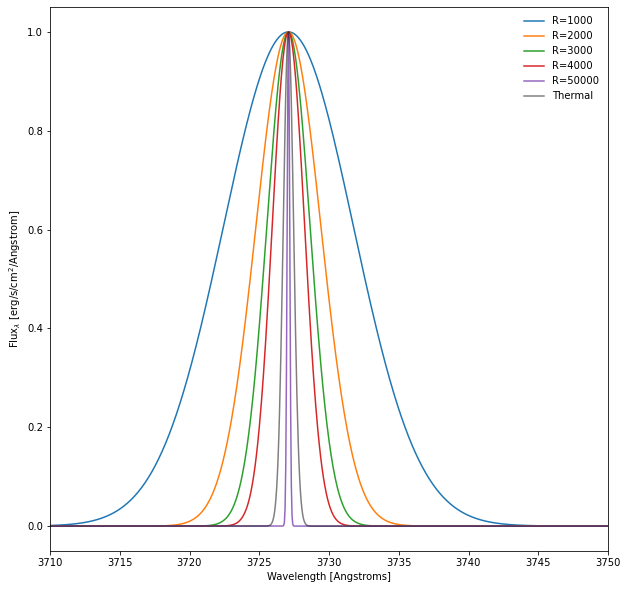

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

for R in [1000., 2000., 3000., 4000., 5.e4]:
    ax.plot(wave, gaussian(wave, lambdaa, dlamba_inst(R, 0.25, lambdaa)), label='R={:.0f}'.format(R))
    
ax.plot(wave, gaussian(wave, lambdaa, dlambdaa), color='k', alpha=0.5, label='Thermal')
    
ax.set_xlabel('Wavelength [Angstroms]')
ax.set_ylabel('Flux$_{\lambda}$ [erg/s/cm$^2$/Angstrom]')

ax.legend(frameon=False, loc=1)
ax.set_xlim(3710., 3750.)

So would a resolution of $R=50,000$ make sense for DESI?  No, as the line would be broader due simply to the thermal velocity of the emitting gas in the galaxy!  Let's see this.  If we have the correct broadening due to _both_ the velocity dispersion of the emitting gas and the instrument, the width saturates no matter the instrumental resolution:

In [7]:
def dlamba_tot(R, z, center, v=1.e-4):
    # Widths of Gaussians add in quadrature; (https://en.wikipedia.org/wiki/Propagation_of_uncertainty).
    return np.sqrt(dlamba_inst(R, z, center)**2. + width(center, v)**2.)

(3710.0, 3750.0)

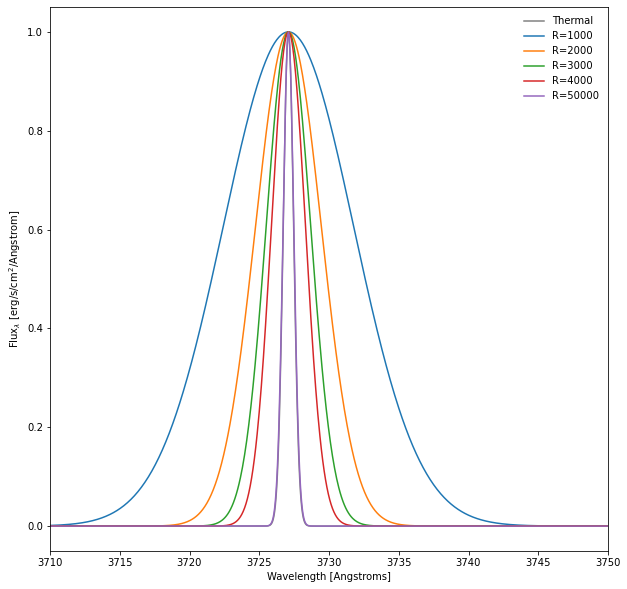

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.plot(wave, gaussian(wave, lambdaa, dlambdaa), color='k', alpha=0.5, label='Thermal')

for R in [1000., 2000., 3000., 4000., 5.e4]:
    ax.plot(wave, gaussian(wave, lambdaa, dlamba_tot(R, 0.25, lambdaa)), label='R={:.0f}'.format(R))
        
ax.set_xlabel('Wavelength [Angstroms]')
ax.set_ylabel('Flux$_{\lambda}$ [erg/s/cm$^2$/Angstrom]')
        
ax.legend(frameon=False, loc=1)
ax.set_xlim(3710., 3750.)

So you can see that with an insufficient instrument, [OII] will become blurred and totally useless to us!  But we need to know what is good enough.  Let's try.

The resolution $R$ defines the resolution element as $R= (\lambda / \Delta \lambda)$, as above, for a galaxy at redshift $z$, for instance:

In [9]:
R       = 9.e3
z       = 1.00

giving the width of a resolution element as

In [10]:
dlambda = OII * (1 + z) / R  # [Angstroms].

A very famous [theorem](https://en.wikipedia.org/wiki/Nyquist-Shannon_sampling_theorem) - incidentally, an entry point to [Information Theory](https://en.wikipedia.org/wiki/Information_theory) and the digital world - tells us that we need to sample a resolution element at least _twice_ to accurately reconstruct a (bandpass limited) function its samples.  To be safe, we'll sample it three times, given a pixel width 1/3 the width of the resolution element:

In [11]:
# width of a pixel in Angstroms, rather than a resolution element.
dlambda  /= 3.

In [12]:
# Let's match our wavelengths to this grid of pixels:
wave     = np.arange(3600, 1.e4, dlambda)

Now, the Mayall Telescope used by DESI has a (primary) mirror that is 3.8m in diameter, so an area of 

In [13]:
# Area of the circular DESI primary mirror.
Area  = np.pi * (3.8 / 2.)**2.

# [m] to [cm].
Area *= 1.e4

Area # [cm^2]

113411.49479459153

with this mirror gently curved to focus light to a point at the [focus](https://en.wikipedia.org/wiki/Cassegrain_reflector), with a focal length of 10.7m.

<img src="images/mirror.jpg" alt="Drawing" style="width: 700px;"/>

When DESI points to the sky, it takes a snapshot of the light caught by 5000 individual fibers at a time.  You can see 500 in a wedge-shaped "petal" below

<img src="images/petal.jpg" alt="Drawing" style="width: 700px;"/>

Each fiber is $w=107 \mu m$ or $10^{-4}m$ in diameter and 10 of the above petals populate the DESI focal plane.  With the $f_{\rm{M1}} = 10.7$m focal length, each fiber recieves light from a circular patch on the sky of $\theta \simeq (w/2) \ / \ f_{\rm{M1}}$.    

In [14]:
# Angular radius of fiber, rather than diameter.
theta  = 107e-6 / 2 / 10.7 # [radians]
theta *= 180. / np.pi      # [degrees]
theta *= 60. * 60.         # [arcseconds]  

In [15]:
theta                      # [arcseconds] 

1.0313240312354819

In reality, the 'plate scale' varies such that a better approximation is 1.5 arcseconds.

In [16]:
theta = 1.5                # [arcseconds]

Each fiber has that a small motor such that it can travel to observe any galaxy within each circle shown:  (You can see more examples with the [viewer](https://www.legacysurvey.org/viewer#IC%201229")).

<img src="images/Fiber.png" alt="Drawing" style="width: 700px;"/>

The light recieved by each fiber is then redirected along an optial fiber to eventually land on a single pixel of a CCD, where each photon is converted to an electron by the [photoelectric effect](https://en.wikipedia.org/wiki/Photoelectric_effect) - one of the first discoveries in Quantum Mechanics by Einstein!  

Our close cousin the Dark Energy Survey observes on an identical twin to the Mayall in Chile and has some of the prettiest [CCDs](https://www.darkenergysurvey.org/the-des-project/instrument/the-camera/) around (each rectangle).  In total, there are sixty two CCDS shown, with 2048 x 4096 pixels each, for a total of 520 million pixels!  By comparison, the latest iPhones have [12 Million pixels](https://www.iphonefaq.org/archives/976253).        

<img src="images/des.jpg" alt="Drawing" style="width: 700px;"/>

Now, the number of galaxes we need (17 million ELGs) defines the line luminosity (brightness of amount of) of [OII] we need to reach, that's our goal.

In [17]:
line_flux = 8.e-17               # [ergs/s/cm2].

Let's talk units.  An erg is $10^{-7}$ Joules, so this is a very small amount of energy, in Joules, arriving per second, on a sq. cm.

In [18]:
def model(wave, sigma, z, r=0.7):
    # Unit amplitude, sigma is the width of the line, z is the redshift and r is the relative amplitudes of the lines in the doublet. 
    return 1. / (1. + r) / np.sqrt(2. * np.pi) / sigma * (r * np.exp(- ((wave - lambdaa * (1. + z)) / np.sqrt(2.) / sigma)**2.) + np.exp(- ((wave - lambdab * (1. + z)) / np.sqrt(2.) / sigma)**2.))

(7440.0, 7480.0)

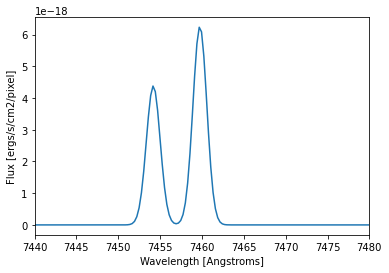

In [19]:
width    = dlamba_inst(R, z, lambdaa)

profile  = model(wave, width, z) # [1/Angstrom].
profile *= line_flux             # [ergs/s/cm2/Angstrom].
profile *= dlambda               # [ergs/s/cm2/pixel].

pl.clf()
pl.plot(wave, profile)
pl.xlabel('Wavelength [Angstroms]')
pl.ylabel('Flux [ergs/s/cm2/pixel]')

pl.xlim((1. + z) * 3720., (1. + z) * 3740.)

In [20]:
# Summing over pixels, gives us the total line flux again:
np.sum(profile)                 # [ergs/s/cm2].

7.999999999996866e-17

While the energy of each OII [photon](https://en.wikipedia.org/wiki/Photon) we recieve can be found from $E=h \nu$, where $h=6.626 \times 10^{-34} J \cdot s$ and a frequency found by $c = \nu \cdot \lambda$.

In [21]:
c        = 2.9979e8 * 1.e10     # [Angstrom/s].

nus      = c / wave             # [Hertz] = [s^{-1}].

Energys  = 6.626e-34 * nus      # [Joules]
Energys *= 1.e7                 # [ergs]

So, the faintest OII emitting galaxy we might observe would result in each DESI pixel (in wavelength, 15 $\mu m$ in physical size) recieving a number of photons per second given by

In [22]:
# ergs per ... to photons per ...
profile   /= Energys            # [photons/s/cm2/pixel].

# Photons recieved by a DESI pixel per second (assuming no fiber loss).
profile   *= Area               # [photons/s/pixel/M1].

In [23]:
# Total number of photons recieved by DESI from the source.
np.sum(profile)                 # [photons/s/M1]

3.406193461049387

Now the quantum efficiency of a CCD isn't quite 100%, so each photon doesn't produce an electron.  Rather, 60 electrons are produced to 100 photons (an efficiency of 60%).

In [24]:
QE       = 0.6
profile *= QE                   # [electrons/s/pixel/M1].

To counter this ineffiency, we take an exposure lasting 15 mins during which time electrons accumulate in the CCD pixels. 

In [25]:
exptime  = 15. * 60.            # [seconds]
profile *= exptime              # [electrons/exposure/pixel/M1]

Text(0, 0.5, 'Flux [electrons/exposure/M1/pixel]')

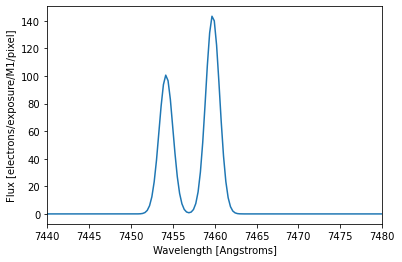

In [26]:
pl.plot(wave, profile)

pl.xlim((1. + z) * 3720., (1. + z) * 3740.)

pl.xlabel('Wavelength [Angstroms]')
pl.ylabel('Flux [electrons/exposure/M1/pixel]')

But there's another small problem.  As the light from the galaxy travels through the atmosphere, it gets buffetted around such that it appeads smudged on the sky.  The apparent size of a (in reality) point-like star dues to this is known as the 'seeing', in arcseconds.  The buffeting can be so strong - depending on the weather - that star light can be lost on the from the fiber even if it's centered correctly.  Let's see this.     

In [27]:
def moffatt(r, fwhm, beta=3.5):
  ##  Apparent radial profile of star-light due to buffeting by the atmosphere.  
  ##  Sec. 4 of https://iopscience.iop.org/article/10.1086/675808/pdf;  [arcsecond].                                                                                                                                                         
  alpha    = fwhm / 2. / (2.**(1./beta) - 1.)**0.5

  return  (2. * (beta - 1.) / alpha / alpha) * (1. + (r/alpha)**2.)**-beta

In [28]:
fwhm       = 2.0
dr         = 0.01

rs         = np.arange(0.0, 15., dr)  ## [arcseconds].        
ms         = moffatt(rs, fwhm)

(-0.1, 6.0)

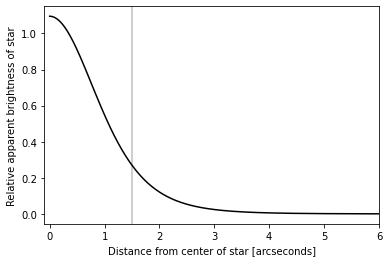

In [29]:
pl.axvline(theta, alpha=0.25, c='k')

pl.plot(rs, ms, c='k')
pl.xlabel('Distance from center of star [arcseconds]')
pl.ylabel('Relative apparent brightness of star')
pl.xlim(left=-0.1, right=6.0)

Text(0, 0.5, 'FIBER FRAC.')

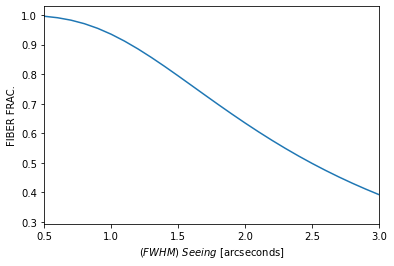

In [30]:
# A range of full-width @ half max. values for the seeing.  
fwhms      = np.arange(0.5, 3.5, 0.1)

# Find the index in our distance grid closest to the size of a fiber. 
indx       = np.abs(rs - theta).argmin()

# A list to collect the fraction of light down a fiber for each value of the seeing. 
fiberfracs = []

# Loop over the seeing values. 
for i, fwhm in enumerate(fwhms):
  # Work out the radial profile of the star.
  ms       = moffatt(rs, fwhm)
  
  # Integrate this to get the total light within a radius
  Is       = 2. * np.pi * dr * np.cumsum(rs * ms)

  # Calculate the fiber fraction for each r value we as for. 
  ffrac    = Is / Is[-1]
  
  # Save the fiber fraction for the radius corresponding to the fiber size. 
  fiberfracs.append(ffrac[indx])

fiberfracs = np.array(fiberfracs)

pl.plot(fwhms, fiberfracs)

pl.xlim(0.5, 3.0)

pl.xlabel(r'$(FWHM) \ Seeing \ [{\rm arcseconds}]$')
pl.ylabel(r'FIBER FRAC.')

So, as the (highly ) [turbulent](https://en.wikipedia.org/wiki/Turbulence) air moves around in the atmosphere, the galaxy light gets smudged to the size of the "seeing".  When this gets bad, $\simeq 3.0$ arcseconds, 60% of the light can be lost!  DESI needs something like an arcsecond seeing to observe, otherwise we just throw the data away.  But finally, this means we can expect 80% of the light to be captured in a normal exposure:       

In [31]:
fiberfrac = 0.8
profile  *= fiberfrac  # [electrons/exposure/pixel/M1]

Now, depending on the phases of the moon, each fiber placed on a galaxy also recieves a "background" amount of (moon)light originating from light _scattered_ by the atmosphere.  This background depends strongly on the phases of the moon - for ELGs we need to avoid observing close to the full moon.  Side note, with an apparent angular diameter of $0.5$ degrees, the moon would fit $\approx 6 \times$ side-by-side in the DESI field of view (3.2 deg diameter). 

<img src="images/moon.jpg" alt="Drawing" style="width: 700px;"/>

A typical level for the background light is 6.4e-18 erg/cm$^2/s/$Angstrom/sq. arcsecond, with a projected fiber area given by 

In [32]:
fib_area = np.pi * theta**2. # [sq. arcsecond]
fib_area

7.0685834705770345

The corresponding _background_ level of photons recieved by a DESI pixel per second (as before):

In [33]:
background  = 3.4e-18       # [erg/s/cm 2/ Angstrom/sq. arcsecond].
background *= fib_area
background                  # [erg/s/cm 2/ Angstrom].

2.4033183799961916e-17

which we convert in the same way as before:

In [34]:
background /= Energys       # [photons/s/cm2/Angstrom].

background *= dlambda       # [photons/s/cm2/pixel].

# Background photons recieved by a DESI pixel per second (assuming no fiber loss).
background *= Area          # [photons/s/pixel/M1].

# Quantum efficiency 
background *= QE            # [electrons/s/pixel/M1].

background *= exptime       # [electrons/exposure/pixel/M1].

In [35]:
background

array([ 73.67064431,  73.67629616,  73.681948  , ..., 204.6239301 ,
       204.62958195, 204.6352338 ])

The background noise is Poisson, on average we expect a background level of electrons, but for any given exposure there will be fluctuations according to a known [distribution](https://en.wikipedia.org/wiki/Poisson_distribution).  Assuming the measured number of electrons is dominated by the background, the variance we expect in the number of measured electrons is then that for a Poisson distribution:

In [36]:
pixel_variance = background # [electrons/exposure/pixel/M1].

In [37]:
noise = []

for p in background:
    noise.append(np.random.poisson(p, 1)[0])
    
noise = np.array(noise)

In [38]:
noise

array([ 81,  77,  67, ..., 221, 209, 202])

Text(0, 0.5, 'Flux [electrons/exposure/M1/pixel]')

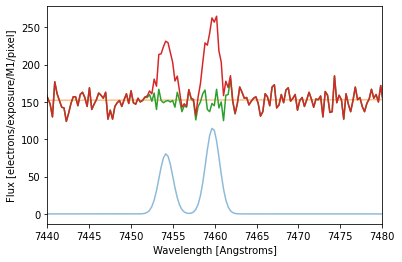

In [39]:
data = profile + noise

pl.plot(wave, profile, alpha=0.5)
pl.plot(wave, background, alpha=0.5)
pl.plot(wave, noise)
pl.plot(wave, data)

pl.xlim((1. + z) * 3720., (1. + z) * 3740.)

pl.xlabel('Wavelength [Angstroms]')
pl.ylabel('Flux [electrons/exposure/M1/pixel]')

DESI has dedicated fibers that point at the sky, rather than at galaxies.  This allows use to measure the sky background in order to subtract the mean level:

In [40]:
data -= background

Text(0, 0.5, 'Flux [electrons/exposure/M1/pixel]')

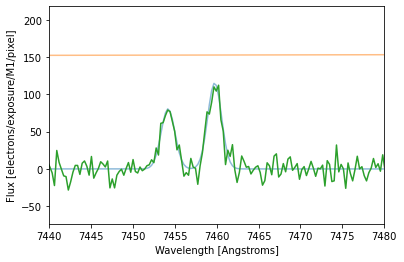

In [41]:
pl.plot(wave, profile, alpha=0.5)
pl.plot(wave, background, alpha=0.5)
pl.plot(wave, data)

pl.xlim((1. + z) * 3720., (1. + z) * 3740.)

pl.xlabel('Wavelength [Angstroms]')
pl.ylabel('Flux [electrons/exposure/M1/pixel]')

We need to establish if this is enough!  This will be an excercise in fitting, as in the Intro.  We'll define a best-fit metric:  $\chi^2  = \sum_p \left ( \frac{D_p - A \cdot M_p}{\sigma_p} \right )^2$ that calculates the cumulative (error weighted) square distance of the data from the model.  Where $A$ represent the line flux, $M$ is the model we defined above and $\sigma_p$ is the (background dominated) standard deviation of electrons in each pixel.

If we differentiate this with respect to $A$, we find the best-fitting line flux (remember, the truth was defined above).   $A = \left (\sum_p D_p M_p / \sigma_p^2 \right ) / \left (\sum_p M_p^2 / \sigma_p^2 \right )$m or

In [42]:
# Estimated line flux
Mp            = model(wave, width, z) * dlambda # [ergs/s/cm2/pixel]
Mp           /= Energys                         # [photons/s/cm2/pixel].  
Mp           *= Area                            # [photons/s/pixel/M1].
Mp           *= QE                              # [electrons/s/pixel/M1].
Mp           *= exptime                         # [electrons/exposure/pixel/M1]. 
Mp           *= fiberfrac                       # [electrons/exposure/pixel/M1].

Text(0, 0.5, 'Flux [electrons/exposure/M1/pixel]')

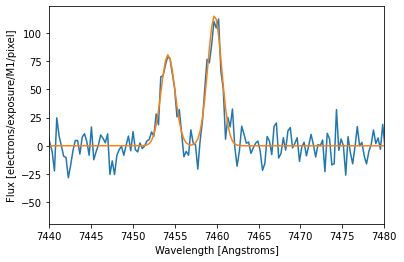

In [43]:
pl.plot(wave,             data)
pl.plot(wave,   Mp * line_flux)

pl.xlim((1. + z) * 3720., (1. + z) * 3740.)

pl.xlabel('Wavelength [Angstroms]')
pl.ylabel('Flux [electrons/exposure/M1/pixel]')

In [44]:
est_line_flux = np.sum(data * Mp / pixel_variance) / np.sum(Mp**2. / pixel_variance)
est_line_flux 

7.705565504918714e-17

Incredible!  We've been able to measure the line flux of our emission line galaxy.  Now what is the error on our measurement?  You can get this from the second derivative of $\chi^2$, $\sigma_A^{-2} = \left ( \frac{1}{2} \right )  \frac{\partial^2 \chi^2}{\partial^2 A} = \sum_p \frac{M_p^2}{\sigma_p^2}$.  

In [45]:
varA = np.sum(Mp**2 / pixel_variance)
sigA = 1. / np.sqrt(varA)
sigA

3.0496513616343895e-18

Giving a signal-to-noise of (how many times bigger is the 'signal' than the noise), $SNR = A / \sigma_A$.

In [46]:
SNR  = est_line_flux / sigA
print('At a limiting OII line flux of {:.3e}, with a resolution {:.3f}, the SNR is {:.3f}!'.format(line_flux, R, SNR))

At a limiting OII line flux of 8.000e-17, with a resolution 9000.000, the SNR is 25.267!


So, finally, the instrumental resolution we've chosen was sufficient to reach the line flux we needed to get 17 Million ELGs. In fact, we have some room to spare as a SNR of 10 is sufficient to be confident we can get a redshift.  This is (almost) exactly the DESI design and looks like this!

<img src="images/spectrograph.png" alt="Drawing" style="width: 700px;"/>

Congratulations!  Your careful analysis has just designed the DESI experiment.  You'd be all set to write your first science paper but, unfortunately, someone beat you to it.

![title](images/comparat.png)

Let's really save on the pennies.  Can you find the resolution necessary to achieve a the minimum SNR required, i.e. what $R$ gives a SNR of 10? Trial and error from Cell 9 will get you to an answer but, with some thought, you might think of a quicker way! 

Tanveer Karim, a DESI scientist and 4th year graduate student at Harvard University completing his PhD in astronomy and astrophysics recently reanalysed this publication with new data!  We asked Tanveer about his path to astronomy, what he liked about the project and what he plans to do next!  

<img src="images/Tanveer.png" alt="Drawing" style="width: 300px;"/>

_I had always been interested in astronomy; even as a child I was fascinated by the sky and space. Following my interest, I took physics in high school and attended the [International Olympiad on Astronomy & Astrophysics](https://www.ioaastrophysics.org/) in 11th grade where my interest in astronomy truly solidified. Afterwards, I studied astronomy in college and did a few summer research internships and realized that I really enjoyed research! As a result, I decided to go to graduate school and here I am!_ 

_The project mentioned [here](https://arxiv.org/pdf/2007.14484.pdf) was my first project in graduate school.  To answer this, the DESI collaboration devised three different ways to estimate the redshift and OII flux from galaxy colors. But, science is ultimately all about testing your hypothesis in real life! So we used the MMT Binospec, a similar telescope to that of DESI, and actually observed small patches of the sky by using these algorithms to decide which way was best.  My primary task was to then devise algorithms and codes that would measure redshift and flux using the [OII] doublet, very similar to how you are constructing them in this notebook, and measure the efficiency of these algorithms. Ultimately, we found out that a couple of our algorithms performed really well and we wrote a paper on it!_ 

<img src="images/TanveerPaper.png" alt="Drawing" style="width: 1000px;"/>

_The part I really enjoyed in this project was writing my own redshift measurement algorithm as well as writing a program that would let me visually inspect the [OII] doublets to make sure that the redshift measurements our code is reporting are indeed accurate. I ended up visually inspecting over 4000 spectra! It was a worthwhile endeavour as we not only tested our algorithms, but also published a catalogue of 1000 ELGs and their redshifts._

_My current project has to do with measuring different cosmological parameters such as the 'clumpiness' of matter in the Universe, $\sigma_{8}$,  and the [sum of neutrino masses](https://en.wikipedia.org/wiki/Neutrino).  Briefly, the clumpiness factor tells you whether if you find a (large) chunk of matter in the Universe, are you more likely to find more matter nearby or is matter more evenly distributed?  This parameter is an important measurement as it tells us about the early Universe and can be a powerful probe to test different models our Universe._ 

_For my project, I am combining two different probes that tells us where matter is -- the DESI imaging survey that tells us where galaxies lie (and where there is galaxy, there is matter), and the Planck CMB lensing survey (which can tell us about the amount of matter by measuring how much the earliest light in the Universe has bent since its inception until it reached us). As you can imagine, these probes are quite different from each other but they both measure the same thing, the distribution of matter in the Universe. So if one can somehow combine them, then we can use maximum signal from both while minimizing the influence of noise and start to say something about which cosmological models best explain the Universe we observe. So stay tuned for more exciting results!_ 

Improve this notebook!  Now you're an expert, why not tidy up the things we missed?  For instance, we've assumed the sky background to be flat in flux.  Is this really true?  Why not use Google and find out.  

See [here](https://arxiv.org/pdf/1310.0615.pdf), [here](https://arxiv.org/pdf/2007.14484.pdf) and [here](https://arxiv.org/pdf/2007.14484.pdf) is you're feeling brave and want to know more.